<a href="https://colab.research.google.com/github/Rakeshavs/Multiple-regression-for-house-prediction/blob/main/SGD%20regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries


In [ ]:
# Ignore warnings to keep output clean
import warnings
warnings.filterwarnings("ignore")

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib  # To save the model


loading the data set of california housing prices


In [ ]:
# Load California housing dataset
california_data = fetch_california_housing()

# Convert features into a Pandas DataFrame
X = pd.DataFrame(california_data.data, columns=california_data.feature_names)

# Target variable (Y)
Y = california_data.target

# Display first 5 rows
print(X.head())
print(Y[:5])  # Print first 5 target values


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
[4.526 3.585 3.521 3.413 3.422]


Shape of Features (X): (20640, 8)
Shape of Target (Y): (20640,)
Missing values in dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count 

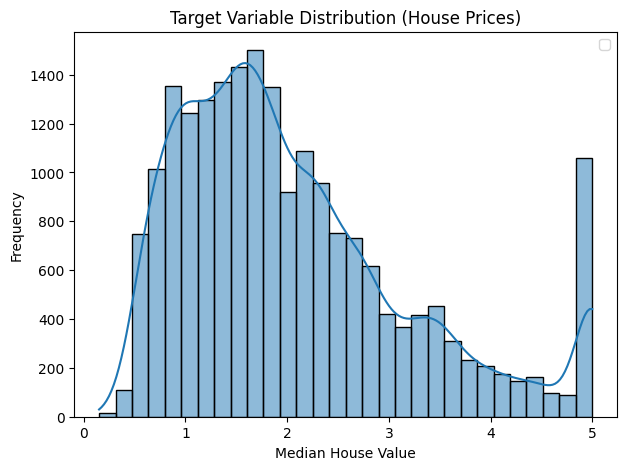

In [ ]:
# Check dataset shape
print(f"Shape of Features (X): {X.shape}")  # (20640, 8)
print(f"Shape of Target (Y): {Y.shape}")  # (20640,)

# Check for missing values
print("Missing values in dataset:")
print(X.isnull().sum())  # Should be all 0 if no missing values

# Summary statistics
print(X.describe())  # Get statistical summary of dataset

# Visualizing target variable distribution
plt.figure(figsize=(7, 5))
sns.histplot(Y, bins=30, kde=True)
plt.title("Target Variable Distribution (House Prices)")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()



In [ ]:
# Check for duplicates (not expected in this dataset)
duplicates = X.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Standardizing the features (scaling data for better model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit & transform X

# Convert scaled data back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())  # Check the scaled data


Number of duplicate rows: 0
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


In [ ]:
# Splitting dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.4, random_state=42)

# Print split dataset shapes
print(f"Training set: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing set: X_test: {X_test.shape}, Y_test: {Y_test.shape}")


Training set: X_train: (2064, 8), Y_train: (2064,)
Testing set: X_test: (18576, 8), Y_test: (18576,)


In [ ]:
# Initialize the model
model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = model.predict(X_test)

# Print first 5 predictions
print(Y_pred[:5])


[0.72101766 1.73720251 2.80039783 2.82925535 2.56536946]


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")#
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared Score (R²): {r2:.4f}")  # Closer to 1 is better


Mean Squared Error (MSE): 0.5306
Root Mean Squared Error (RMSE): 0.7284
Mean Absolute Error (MAE): 0.5309
R-Squared Score (R²): 0.6008


In [ ]:
# Save the trained model to a file
joblib.dump(model, "california_housing_model.pkl")
print("Model saved successfully!")

# Load the model (for future use)
loaded_model = joblib.load("california_housing_model.pkl")

# Predict using loaded model
new_predictions = loaded_model.predict(X_test[:])
print(new_predictions)


Model saved successfully!
[0.72101766 1.73720251 2.80039783 ... 2.82139331 2.40774588 1.9154149 ]
